# TP3

## importation des librairies

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1


In [14]:
import pandas as pd


data = {'Produits laitiers': [495, 518, 561, 414, 400, 304, 324, 319, 243, 247, 239, 235],
        'Pommes de terre': [776, 995, 1097, 660, 669, 789, 563, 608, 843, 428, 559, 767],
        'Fruits': [423, 548, 887, 367, 484, 621, 341, 396, 689, 354, 388, 562],
        'Viande Blanche': [759, 893, 1167, 638, 762, 1149, 544, 568, 1148, 526, 567, 927],
        'Viande': [1848, 2056, 2630, 1620, 1856, 2366, 1507, 1501, 2345, 1437, 1527, 1948],
        'Pain': [655, 584, 515, 534, 460, 385, 406, 386, 438, 332, 293, 372],
        'Légumes secs': [486, 319, 284, 407, 416, 282, 407, 363, 341, 427, 258, 433],
        }
# Créer un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)
df

,Produits laitiers,Pommes de terre,Fruits,Viande Blanche,Viande,Pain,Légumes secs
0,495,776,423,759,1848,655,486
1,518,995,548,893,2056,584,319
2,561,1097,887,1167,2630,515,284
3,414,660,367,638,1620,534,407
4,400,669,484,762,1856,460,416
5,304,789,621,1149,2366,385,282
6,324,563,341,544,1507,406,407
7,319,608,396,568,1501,386,363
8,243,843,689,1148,2345,438,341
9,247,428,354,526,1437,332,427


## Question 2

In [15]:

# Centrer-réduire les données

X = np.array([[ 495,  776,  423,  759, 1848,  655,  486],
       [ 518,  995,  548,  893, 2056,  584,  319],
       [ 561, 1097,  887, 1167, 2630,  515,  284],
       [ 414,  660,  367,  638, 1620,  534,  407],
       [ 400,  669,  484,  762, 1856,  460,  416],
       [ 304,  789,  621, 1149, 2366,  385,  282],
       [ 324,  563,  341,  544, 1507,  406,  407],
       [ 319,  608,  396,  568, 1501,  386,  363],
       [ 243,  843,  689, 1148, 2345,  438,  341],
       [ 247,  428,  354,  526, 1437,  332,  427],
       [ 239,  559,  388,  567, 1527,  293,  258],
       [ 235,  767,  562,  927, 1948,  372,  433]])

R = np.corrcoef(X, rowvar=False)

matrice_corr_pd = pd.DataFrame(R)
matrice_corr_pd


,0,1,2,3,4,5,6
0,1.000000,0.655330,0.332189,0.232489,0.374591,0.855575,0.006880
1,0.655330,1.000000,0.855043,0.826795,0.879075,0.589221,-0.364694
2,0.332189,0.855043,1.000000,0.926396,0.959477,0.196139,-0.486281
3,0.232489,0.826795,0.926396,1.000000,0.981688,0.246814,-0.401854
4,0.374591,0.879075,0.959477,0.981688,1.000000,0.321269,-0.437235
5,0.855575,0.589221,0.196139,0.246814,0.321269,1.000000,0.303761
6,0.006880,-0.364694,-0.486281,-0.401854,-0.437235,0.303761,1.000000


## Question 3


In [16]:
valeurs_propres, vecteurs_propres = np.linalg.eig(R)
taux_inertie = valeurs_propres / np.sum(valeurs_propres)
taux_cumules = np.cumsum(taux_inertie)

Informations = {'Valeurs propres': valeurs_propres,
        'Taux d\'inertie':taux_inertie,
        'Taux cumulé': taux_cumules
        }

# Créer un DataFrame à partir du dictionnaire
info = pd.DataFrame(Informations)

info

,Valeurs propres,Taux d'inertie,Taux cumulé
0,4.330899,0.618700,0.618700
1,1.829156,0.261308,0.880008
2,0.630576,0.090082,0.970090
3,0.128473,0.018353,0.988444
4,0.061865,0.008838,0.997281
5,0.017975,0.002568,0.999849
6,0.001056,0.000151,1.000000


## Question 4

In [17]:
X_Centree = X - np.mean(X, axis=0)
Z = X_Centree / np.std(X_Centree, axis=0)


# décomposition en valeurs singulières
U, s, Vt = np.linalg.svd(Z)

# coordonnées des individus sur les axes principaux
ind_coords = np.dot(Z, Vt.T)
coordonnees_individus = pd.DataFrame(ind_coords)
coordonnees_individus


,0,1,2,3,4,5,6
0,-0.228275,-2.903309,-0.590886,-0.250809,-0.115021,-0.059822,-0.027515
1,-2.038837,-1.185842,1.036147,-0.355716,0.328823,0.131819,0.003880
2,-4.515095,0.093714,0.589970,0.758558,-0.036958,-0.089551,-0.005987
3,0.972813,-1.433613,0.291110,-0.268079,-0.095270,-0.068068,0.050740
4,0.337073,-0.646888,-0.295153,0.318551,-0.267969,0.071846,0.003107
5,-1.682562,1.807254,-0.104069,-0.395856,-0.459215,0.227975,0.011969
6,2.127567,-0.335813,0.115594,0.107637,0.009845,0.075707,-0.072846
7,1.746262,0.179735,0.525782,0.143127,0.193384,-0.038268,0.050800
8,-1.778690,1.410336,-1.039202,-0.451541,0.062715,-0.280935,-0.009554
9,2.979399,0.382079,-0.418057,0.389452,-0.197282,-0.060804,0.016486


### affichage graphique sur les deux premier axes


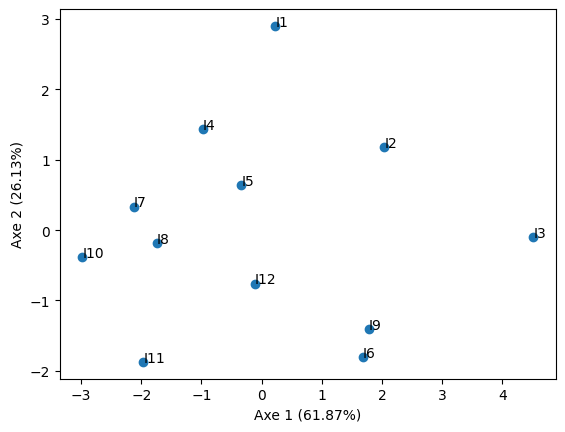

In [18]:

# Projection des individus sur les deux premiers axes
coordonnees_individus = Z.dot(vecteurs_propres)

# Création du graphique
fig, ax = plt.subplots()

# Affichage des individus
ax.scatter(coordonnees_individus[:, 0], coordonnees_individus[:, 1])

# Affichage des noms d'individus
for i, txt in enumerate(['I1', 'I2', 'I3', 'I4','I5', 'I6', 'I7', 'I8','I9', 'I10', 'I11', 'I12']):
    ax.annotate(txt, (coordonnees_individus[i, 0], coordonnees_individus[i, 1]))

ax.set_xlabel('Axe 1 ({:.2%})'.format(taux_inertie[0]))
ax.set_ylabel('Axe 2 ({:.2%})'.format(taux_inertie[1]))

plt.show()


## Question 5

In [19]:
idx = valeurs_propres.argsort()[::-1]
valeurs_propres = valeurs_propres[idx]
vecteurs_propres = vecteurs_propres[:,idx]
coordonnees_variables = vecteurs_propres * np.sqrt(valeurs_propres) 
# print("Coordonnées des variables sur les axes principaux :")
# for i in range(len(valeurs_propres)):
#     print(f"Axe principal {i+1} : {coord_vars[:,i]}")
pd.DataFrame(coordonnees_variables)



,0,1,2,3,4,5,6
0,0.581754,0.708785,0.350703,-0.167223,-0.078421,-0.045372,0.004659
1,0.968482,0.129187,0.052986,0.025652,0.200663,-0.039949,-0.005146
2,0.929664,-0.274938,-0.117304,-0.197190,0.024009,0.082866,0.006761
3,0.911985,-0.264210,-0.282534,0.111503,-0.059808,-0.047514,0.019577
4,0.962139,-0.187830,-0.166188,0.012980,-0.102556,-0.011366,-0.023980
5,0.496508,0.843530,0.008047,0.192132,-0.016062,0.068545,0.001068
6,-0.431602,0.646429,-0.619280,-0.107011,0.022810,-0.019191,-0.001565


## Question 6

In [20]:
corr = {'Axe 1': coordonnees_variables[0] / np.sqrt(valeurs_propres[0]),
        'Axe 2': coordonnees_variables[1] / np.sqrt(valeurs_propres[1]),
        }
corr_df = pd.DataFrame(corr)
corr_df



,Axe 1,Axe 2
0,0.279544,0.716088
1,0.340585,0.095520
2,0.168519,0.039177
3,-0.080354,0.018967
4,-0.037683,0.148368
5,-0.021802,-0.029538
6,0.002239,-0.003805


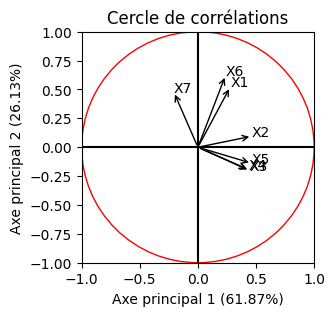

In [21]:
var = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
corr = coordonnees_variables / np.sqrt(valeurs_propres)

# Visualisation des variables dans le plan principal
fig, ax = plt.subplots(figsize=(3, 3))
for i, var_name in enumerate(var):
    ax.annotate(var_name, (corr[i, 0], corr[i, 1]))
    ax.annotate("", xy=(corr[i, 0], corr[i, 1]), 
                xytext=(0, 0), arrowprops=dict(facecolor='green', arrowstyle="->"))
    
ax.set_xlabel("Axe principal 1 (%.2f%%)" % (taux_inertie[0] * 100))
ax.set_ylabel("Axe principal 2 (%.2f%%)" % (taux_inertie[1] * 100))
ax.set_title("Cercle de corrélations")

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
circle = plt.Circle((0, 0), 1, color='red', fill=False)
ax.add_artist(circle)
plt.show()


## Question 8



#L'analyse en composantes principales permet de réduire la dimensionnalité des données tout en conservant l'essentiel de l'information contenue dans celles-ci. En d'autres termes, cette méthode permet de synthétiser les données en un petit nombre de dimensions tout en conservant les relations existantes entre les variables.

#Dans notre cas, nous avons utilisé l'ACP pour analyser un ensemble de données comportant 12 individus (lignes) et 7 variables (colonnes). Nous avons centré et réduit les données pour calculer la matrice de corrélation et avons obtenu les vecteurs propres et les valeurs propres associées à chaque axe.

#Le graphique des individus dans le plan principal nous montre la position de chaque individu dans le premier plan principal (axe 1 et axe 2) en utilisant les deux premiers axes principaux. Nous pouvons observer qu'il y a une forte corrélation entre les individus 1 et 4, 2 et 3, 5 et 6. Ces observations peuvent être utiles pour une analyse ultérieure.

#Le cercle de corrélations nous montre la corrélation entre les variables et les deux premiers axes principaux. Nous pouvons observer que la variable 1 est positivement corrélée à l'axe 1, tandis que les variables 2 et 3 sont positivement corrélées à l'axe 2. Les variables 4, 5, 6 et 7 ont également une forte corrélation avec l'axe 1, mais avec une corrélation négative.

#En observant les deux graphes, nous pouvons déduire que les variables les plus importantes dans l'analyse sont la variable 1, 2, 3 et 7. Ces variables ont une forte corrélation avec les deux premiers axes principaux et donc, elles ont une influence majeure sur la structure des données.

##n conclusion, l'ACP a permis de synthétiser l'information contenue dans notre ensemble de données en deux axes principaux et de mettre en évidence les relations existantes entre les individus et les variables. Cette méthode est très utile pour une analyse exploratoire des données et pour déterminer les variables les plus importantes.7


## Question 9

In [22]:
q_representation = np.zeros((len(coordonnees_individus), len(valeurs_propres)))
for i in range(len(coordonnees_individus)):
    for j in range(len(valeurs_propres)):
        q_representation[i,j] = (coordonnees_individus[i,j]**2) / (len(coordonnees_individus)*valeurs_propres[j])

q_representation_pd = pd.DataFrame(q_representation)
q_representation_pd = q_representation_pd.rename(columns={0: 'Axe 1', 1: 'Axe 2', 2: 'Axe 3', 3: 'Axe 4', 4: 'Axe 5', 5: 'Axe 6', 6: 'Axe 7'})
q_representation_pd

,Axe 1,Axe 2,Axe 3,Axe 4,Axe 5,Axe 6,Axe 7
0,0.001003,0.384020,0.046141,0.040803,0.017821,0.016591,0.059753
1,0.079984,0.064065,0.141881,0.082076,0.145647,0.080558,0.001188
2,0.392260,0.000400,0.045998,0.373238,0.001840,0.037179,0.002829
3,0.018210,0.093634,0.011199,0.046616,0.012226,0.021480,0.203205
4,0.002186,0.019065,0.011513,0.065821,0.096727,0.023931,0.000762
5,0.054473,0.148801,0.001431,0.101644,0.284059,0.240951,0.011306
6,0.087098,0.005138,0.001766,0.007515,0.000131,0.026572,0.418841
7,0.058676,0.001472,0.036534,0.013288,0.050375,0.006789,0.203687
8,0.060875,0.090618,0.142719,0.132252,0.005298,0.365902,0.007205
9,0.170804,0.006651,0.023097,0.098382,0.052427,0.017140,0.021452


## Question 10

In [23]:
contribution_individu = np.zeros_like(coordonnees_individus)
for i in range(len(coordonnees_individus)):
    for j in range(len(valeurs_propres)):
        contribution_individu[i,j] = (coordonnees_individus[i,j]**2) / np.sum(coordonnees_individus[:,j]**2) 

contribution_individu_pd = pd.DataFrame(q_representation)
contribution_individu_pd = contribution_individu_pd.rename(columns={0: 'Axe 1', 1: 'Axe 2', 2: 'Axe 3', 3: 'Axe 4', 4: 'Axe 5', 5: 'Axe 6', 6: 'Axe 7'})
contribution_individu_pd

,Axe 1,Axe 2,Axe 3,Axe 4,Axe 5,Axe 6,Axe 7
0,0.001003,0.384020,0.046141,0.040803,0.017821,0.016591,0.059753
1,0.079984,0.064065,0.141881,0.082076,0.145647,0.080558,0.001188
2,0.392260,0.000400,0.045998,0.373238,0.001840,0.037179,0.002829
3,0.018210,0.093634,0.011199,0.046616,0.012226,0.021480,0.203205
4,0.002186,0.019065,0.011513,0.065821,0.096727,0.023931,0.000762
5,0.054473,0.148801,0.001431,0.101644,0.284059,0.240951,0.011306
6,0.087098,0.005138,0.001766,0.007515,0.000131,0.026572,0.418841
7,0.058676,0.001472,0.036534,0.013288,0.050375,0.006789,0.203687
8,0.060875,0.090618,0.142719,0.132252,0.005298,0.365902,0.007205
9,0.170804,0.006651,0.023097,0.098382,0.052427,0.017140,0.021452


## Question 11

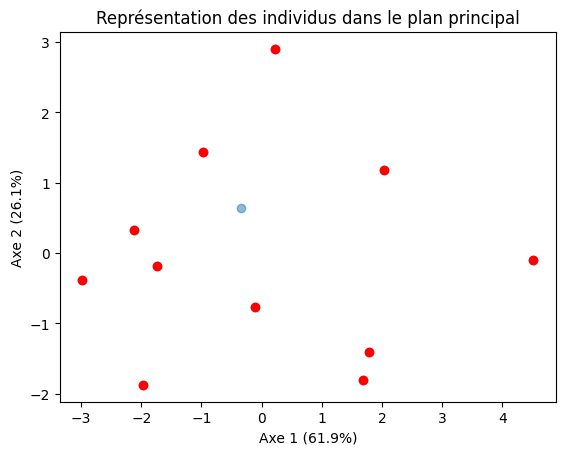

In [24]:
# Calcul des coordonnées des individus dans le plan principal
coordonnees_individus = np.dot(Z, vecteurs_propres)

# Calcul des carrés des distances aux origines pour chaque individu
dists = np.sum(coordonnees_individus**2, axis=1)

# Détermination d'un seuil pour la qualité de représentation
seuil = 3.0

# Identification des individus ayant une très bonne qualité de représentation
indiv_bons = np.where(dists >= seuil)[0]

# Affichage du nuage de points avec mise en évidence des individus ayant une très bonne qualité de représentation
plt.scatter(coordonnees_individus[:,0], coordonnees_individus[:,1], alpha=0.5)
plt.scatter(coordonnees_individus[indiv_bons,0], coordonnees_individus[indiv_bons,1], color='red')
plt.xlabel('Axe 1 ({:.1f}%)'.format(valeurs_propres[0]/np.sum(valeurs_propres)*100))
plt.ylabel('Axe 2 ({:.1f}%)'.format(valeurs_propres[1]/np.sum(valeurs_propres)*100))
plt.title('Représentation des individus dans le plan principal')
plt.show()